<a href="https://colab.research.google.com/github/rodrigoromanguzman/Actividades_Aprendizaje-/blob/main/MNA_IAyAA_semana_6_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [58]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import io

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         

from sklearn.model_selection import learning_curve, validation_curve

from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold 

#**Ejercicio-1.** 

Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como
se indica en la página de la UCI.

In [43]:


# Realizamos la traduccion del aleman al ingles con un documento que contiene
# la descripcion de los datos
descriptores = 'https://drive.google.com/file/d/1hw9fChZOYYhcYqkrPXEcHbzzDkPYvhVy/view?usp=sharing'
descriptor_cont = 'https://drive.google.com/uc?id=' + descriptores.split('/')[-2]
df_desc = pd.read_csv(descriptor_cont)
# Definimos la columna con los nombres en ingles
nombres = df_desc.iloc[0:,1]

#Descargamos los datos de un archivo que tenemos en google drive
url = 'https://drive.google.com/file/d/1joEvb460aClIt0OvWabG_S7bsPC4bUpq/view?usp=sharing'
path='https://drive.google.com/uc?id=' + url.split('/')[-2]
response = requests.get(path)
contents = response.text
lineas = contents.split('\n')

df_credit = pd.read_csv(io.StringIO('\n'.join(lineas[1:])), sep=' ', header=None, names=nombres)
df_credit


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


#**Ejercicio-2.**

Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de
15%.

In [44]:
# Dividimos los datos en entrenamiento y prueba (test_size=0.15)
train, test = train_test_split(df_credit, test_size=0.15, random_state=42, shuffle=True)

In [45]:
# Definimos como X a todas las variables de entrada y la variable Y todas las variables de salida.
# Los cambiamos a numpy dado que sklearn trabaja con numpy
X_train = train.iloc[:, :-1].values  
Y_train = train.iloc[:, -1].values  
X_test = train.iloc[:, :-1].values  
Y_test = train.iloc[:, -1].values 
print(X_train)

[[ 1 48  4 ...  2  1  2]
 [ 2 48  1 ...  2  1  2]
 [ 1  6  2 ...  2  2  2]
 ...
 [ 4 48  2 ...  2  1  2]
 [ 4  7  3 ...  2  1  2]
 [ 2 24  3 ...  2  2  2]]


#**Ejercicio-3.**

In [46]:
#Primero realizamos un breve analisis de los datos que tenemos para conocer un poco mas de sus datos faltantes
print(df_credit.info())

print('\n SUMAMOS LOS DATOS NULOS POR COLUMNA \n')
df_credit.isna().sum()

# En conclusion no tenemos datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [47]:
df_credit['people_liable'].unique()

array([2, 1])

In [48]:
# Para las variables categoricas nuestro metodo de imputacion sera tomar
# el valor con mayor numero de apariciones
# aplicaremos OneHotEncoder
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputation strategy for categorical variables
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Example: Using OneHotEncoder for encoding
])
# Aplicar OneHotEncoder a las variables categoricas nos permite crear
# columnas binarias para cada valor. Para el caso de variables categoricas binarias
# resulta redundante aplicar OneHotEncoder e incluso aumenta la complejidad
# por lo tanto evitaremos aplicarlo a las variables binarias. En este caso solo
# descartamos people_liable

# Para las variables cuantitativas aplicaremos la imputacion con la media (promedio)
# Ademas escalaremos los valores con StandardScaler para que los datos
# queden centrados en cero y tengan una desviacion standard de 1.
quantitative_pipeline = Pipeline([
    #Mean median
    ('imputer', SimpleImputer(strategy='mean')),  # Imputation strategy for quantitative variables
    ('scaler', StandardScaler())  # Example: Using StandardScaler for scaling
])

#Separamos las columnas dado su tipo de variable
categorical_cols = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing']
categorical_cols_idxs = [df_credit.columns.get_loc(col) for col in categorical_cols]

quantitative_cols = ['duration','amount','employment_duration','installment_rate','present_residence','age','number_credits','people_liable']
 
non_binary_quantitative_cols = ['duration','amount','employment_duration','installment_rate','present_residence','age','number_credits']
quantitative_cols_idxs = [df_credit.columns.get_loc(col) for col in non_binary_quantitative_cols]


# ColumnTransformer nos permite aplicar diferentes preprocesamientos a distintas
# secciones de los datos
preprocessor = ColumnTransformer([
    ('categorical', categorical_pipeline, categorical_cols_idxs),  # categorical_cols: list of categorical column names
    ('quantitative', quantitative_pipeline, quantitative_cols_idxs)  # quantitative_cols: list of quantitative column names
])


#**Ejercicio-4.**

In [49]:
# Definimos las metricas que utilizaremos para evaluar nuestros modelos

def mi_precision(yreal, ypred):
  vn,fp,fn,vp = confusion_matrix(yreal,ypred).flatten()
  accuracy = (vp+vn)/(vn+fp+fn+vp)
  return accuracy

def mi_accuracy(yreal, ypred):
  vn,fp,fn,vp = confusion_matrix(yreal,ypred).flatten()
  accuracy = vp/(vp+fn)
  return accuracy

def mi_gmean(yreal, ypred):
  vn,fp,fn,vp = confusion_matrix(yreal,ypred).flatten()
  sensitivity, specificity = (vp/(vp+fn),vn/(vn+fp))
  gmean = np.sqrt(sensitivity * specificity)
  return gmean

def mi_f1_score(yreal, ypred):
  vn,fp,fn,vp = confusion_matrix(yreal,ypred).flatten()
  f1_score = (2*vp)/((2*vp)+fp+fn)
  return f1_score

def mi_recall(yreal, ypred):
  matrizConfusion = confusion_matrix(yreal,ypred)
  vn,fp,fn,vp = matrizConfusion.flatten()
  return vp/(vp+fn)

In [50]:
results = []
#Definimos los modelos que utilizaremos
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier()]
nombre_modelos = ['Regresion Logistica', 'Arbol de decision','Bosque aleatorio']

for i in range(len(models)):

  #Definimos el tipo de validacion cruzada que utilizaremos
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3) 

  # Utilizamos el preprocesador que definimos arriba con el modelo correspondiente
  # para cada iteracion
  pipe = Pipeline([
      ('preprocessor', preprocessor),
      ('model', models[i])
  ])

  mismetricas =  {'accuracy':make_scorer(mi_accuracy),'precision':make_scorer(mi_precision),'f1_score':make_scorer(mi_f1_score),'gmean':make_scorer(mi_gmean),'recall':make_scorer(mi_recall)}

  resultadosOU = cross_validate(pipe, 
                          X_train, Y_train,
                          scoring = mismetricas,
                          cv=kfold)

  results.append(resultadosOU) 

  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean F1Score: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombre_modelos[i],
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']),
                                                                          np.mean(resultadosOU['test_precision']),
                                                                          np.std(resultadosOU['test_precision']), 
                                                                          np.mean(resultadosOU['test_f1_score']),
                                                                          np.std(resultadosOU['test_f1_score']),
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_gmean']),
                                                                          np.std(resultadosOU['test_gmean']), 
                                                                          ))

Regresion Logistica:
mean Accuracy: 0.872 (0.0302)
mean Precision: 0.755 (0.0250)
mean F1Score: 0.833 (0.0179)
mean Recall: 0.872 (0.0302)
Gmean: 0.645 (0.0445)

Arbol de decision:
mean Accuracy: 0.753 (0.0379)
mean Precision: 0.664 (0.0406)
mean F1Score: 0.759 (0.0301)
mean Recall: 0.753 (0.0379)
Gmean: 0.584 (0.0607)

Bosque aleatorio:
mean Accuracy: 0.907 (0.0268)
mean Precision: 0.753 (0.0315)
mean F1Score: 0.837 (0.0208)
mean Recall: 0.907 (0.0268)
Gmean: 0.593 (0.0515)



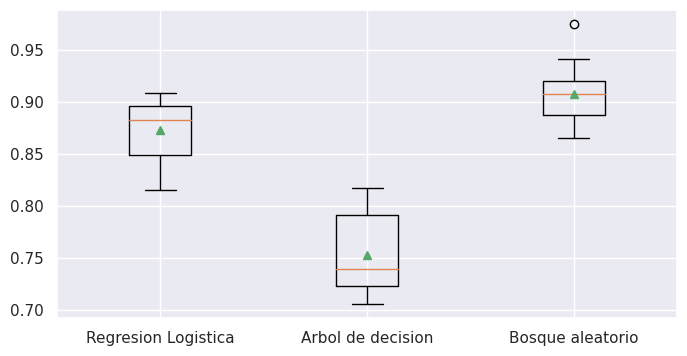

In [51]:
#visualizamos los valores en diagrama de caja y bigotes con la metrica recall
sns.set(rc={'figure.figsize':(8,4)})

bpGmean = list()
for i in range(len(results)):
  rr = results[i]['test_recall']
  bpGmean.append(rr)
plt.boxplot(bpGmean, labels=nombre_modelos, showmeans=True)

plt.show()

In [52]:
#Tomamos la funcion para graficar curvas que definimos en el la semana 4

def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Exactitud (accuracy)')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando
el tamaño de la muestra para el modelo de regresión Logística con su
hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de
los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del
desempeño de dicha función “learning_curve()”

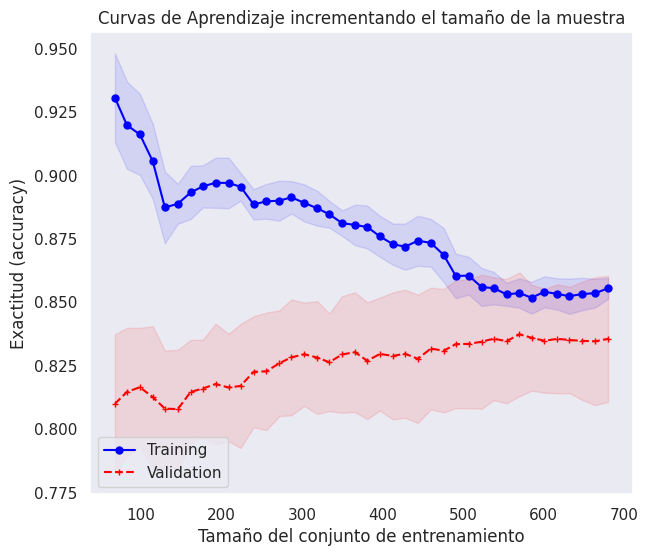

In [53]:

delta_train_sz = np.linspace(0.1,1,40)

#Definimos el modelo que utilizaremos:

kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3) 
# Utilizamos el preprocesador que definimos arriba con el modelo LogisticRegression
# para cada iteracion
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

mi_f1_scorer = make_scorer(mi_f1_score)

#Calculamos las curvas de aprendizaje con la mreica f1
tr_sizes, tr_scores, val_scores = learning_curve(estimator =  pipe,    
                                                X = X_train,
                                                y = Y_train,
                                                cv =  kfold,
                                                train_sizes = delta_train_sz,
                                                scoring = mi_f1_scorer,
                                                random_state=11)

mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)


Obtener las curvas de validación (validation_curve) en la cual se va incrementando
la complejidad del hiperparámetro “max_depth” para el modelo de árbol de
decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima
profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del
desempeño del modelo.

In [65]:
#Definimos el modelo que utilizaremos:
depths = range(1, 21)

# Initialize lists to store the training and validation scores for each depth
train_scores_mean = []
train_scores_std = []
val_scores_mean = []
val_scores_std = []
sizes = []

# Define the scoring metric
mi_f1_scorer = make_scorer(mi_f1_score)

# Define the cross-validation strategy
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

# Iterate over the depths
for depth in depths:
    # Create the pipeline with the preprocessor and DecisionTreeClassifier
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', DecisionTreeClassifier(max_depth=depth))
    ])

    # Calculate the learning curve for the current depth
    sizes_, train_scores, val_scores = learning_curve(
        estimator=pipe,
        X=X_train,
        y=Y_train,
        cv=kfold,
        scoring=mi_f1_scorer,
        random_state=11
    )

    # Store the size as a list of single-element arrays
    sizes.append(np.array([sizes_]))

    # Calculate the mean and standard deviation of the scores
    train_scores_mean.append(np.mean(train_scores, axis=1))
    train_scores_std.append(np.std(train_scores, axis=1))
    val_scores_mean.append(np.mean(val_scores, axis=1))
    val_scores_std.append(np.std(val_scores, axis=1))

# Concatenate the sizes and scores from all depths
train_sizes = np.concatenate(sizes)
train_scores_mean = np.concatenate(train_scores_mean)
train_scores_std = np.concatenate(train_scores_std)
val_scores_mean = np.concatenate(val_scores_mean)
val_scores_std = np.concatenate(val_scores_std)

# Plot the learning curves
mi_LearningCurvePlot(train_sizes, train_scores_mean, val_scores_mean)

AxisError: ignored

#**Ejercicio-5.**

#**Ejercicio-6.**

In [54]:
None

###**Fin de la Actividad de la semana 6.**